In [1]:
# Importanto bibliotecas utilizadas na aps
import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *
import netpixi
import pandas as pd

g = Graph(directed=False)  # Não direcional - Documentação

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
# Lendo o arquivo
df_principal = pd.read_csv('games.csv')
df_principal.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [4]:
# Verificando valores únicos das métricas
print(df_principal['User score'].unique())
print("---------------------------------------------")
print(df_principal['Metacritic score'].unique())

[  0  63  59  77  68 100  57  80  51  69  97  53  46  65  55  84  71  60
  61  78  87  92  73  83  82  98  76  66  95  94  96  88]
---------------------------------------------
[ 0 62 64 53 84 89 70 86 40 87 92 76 51 49 81 69 72 68 52 82 59 77 79 71
 74 73 88 47 75 66 50 63 67 80 58 90 39 78 55 85 65 91 83 57 56 44 60 61
 48 46 23 45 94 27 38 30 35 54 41 43 32 34 93 37 36 95 42 29 24 96 20 33
 97]


In [5]:
# Retira valores Nulos presentes nas colunas listas
df_principal.dropna(subset=['Tags', 'User score', 'Metacritic score'], inplace=True)
df_principal.reset_index(inplace=True, drop=True)
df_principal.shape

(57702, 39)

In [6]:
# Transforma a coluna Tags em lista de Tags:
df_principal['Tags'] = df_principal.Tags.apply(lambda x: str(x).split(','))
df_principal['Tags']

0                         [Indie, Casual, Sports, Bowling]
1        [Indie, Action, Pixel Graphics, 2D, Retro, Arc...
2        [2D Platformer, Atmospheric, Surreal, Mystery,...
3        [Indie, Adventure, Nudity, Violent, Sexual Con...
4        [Turn-Based Combat, Massively Multiplayer, Mul...
                               ...                        
57697    [Early Access, VR, Swordplay, Action RPG, Anim...
57698    [Action, Simulation, Dungeons & Dragons, Actio...
57699    [3D Platformer, Action-Adventure, Funny, Casua...
57700    [First-Person, Detective, Social Deduction, Mu...
57701    [Casual, Simulation, Puzzle, Exploration, Imme...
Name: Tags, Length: 57702, dtype: object

In [7]:
df_principal = df_principal.sample(n=350)

In [8]:
# Varre valores únicos das Tags e os mapeia em um número de 0 a n_tags 

tags_map = {}
n_tags = df_principal.Tags.explode().unique().shape[0]

for i, tag in enumerate(df_principal.Tags.explode().unique()):
    tags_map[tag] = i

In [9]:
# Cria veror de tags no formato:
# [0 1 0 1  0 .. 0]
# Sendo as posições na lista determinadas por tags_map -> {Retro : x , ...}

# Similaridade a ser determinada pela distância de Manhattan entre as Tags de dois jogos
# Quanto menor a distância mais similares são os jogos.

output = []
for i, r in df_principal.iterrows():
    tag_vector = [0 for i in range(n_tags)]
    for tag in r.Tags:
        tag_vector[tags_map[tag]] = 1
    output.append(tag_vector)
    
# Cria coluna [0 0 1 ... 0 1] para indicar as tags de cada jogo
df_principal['tag_vector'] = output
df_principal

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,tag_vector
55598,2111040,Dead Beacon,"Nov 18, 2022",0 - 20000,3,0,3.99,0,After your sailboat is damaged by a mysterious...,"['English', 'Spanish - Spain']",...,0,0,SelianiDEV,SelianiDEV,"Single-player,Steam Achievements","Action,Adventure,Indie","[Action, First-Person, Horror, Action-Adventur...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
10526,1493880,Mira's Brush,"Jan 21, 2022",0 - 20000,0,0,9.99,0,🖌️Features +100 STEAM ACHIEVEMENTS +30+ Hours ...,['English'],...,0,0,Duckbill ProDucktions,Angel Star Studios,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","[Colorful, Immersive, Exploration, Puzzle-Plat...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."
52484,589290,Holdfast: Nations At War,"Mar 5, 2020",500000 - 1000000,740,0,19.99,8,Holdfast: Nations At War is an online multipla...,"['English', 'French', 'German', 'Spanish - Spa...",...,384,921,Anvil Game Studios,Anvil Game Studios,"Multi-player,PvP,Online PvP,Steam Achievements...","Action,Indie,Massively Multiplayer,Simulation,...","[Historical, Multiplayer, War, Strategy, Milit...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
44559,773490,谜桥 / RiddleBridge,"Mar 1, 2018",0 - 20000,0,0,3.99,0,This is a beautiful love story of the cowherd ...,['Simplified Chinese'],...,0,0,飞鹰互娱,飞鹰互娱,Single-player,"Casual,Indie,Strategy","[Casual, Indie, Strategy, Puzzle, Romance, Ear...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
29896,1576900,Spirit Bounce,"Jun 28, 2021",0 - 20000,0,0,7.99,0,Spirits are responsible for the whole balance ...,"['English', 'Portuguese - Brazil']",...,0,0,ChrisBSM,ChrisBSM,"Single-player,Steam Achievements,Steam Worksho...","Casual,Indie,Early Access","[Early Access, Female Protagonist, Arcade, Fan...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,1168530,登塔者们 Babel Climbers,"Feb 29, 2020",0 - 20000,0,0,9.99,0,"At the beginning of the design, the game made ...","['Simplified Chinese', 'English']",...,0,0,Nianless,Nianless,Single-player,"Adventure,Casual,Indie,RPG,Strategy,Early Access","[Casual, RPG, Indie, Strategy, Adventure, Earl...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
34510,1015290,Trapped in Fear,"Dec 2, 2019",0 - 20000,0,0,4.99,0,Has it ever happened to you? You are a child t...,"['English', 'German', 'Polish']",...,0,0,Rain of Cubes,Rain of Cubes,"Single-player,Steam Achievements,Steam Cloud","Adventure,Indie","[Indie, Adventure]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
17132,252530,OMSI 2: Steam Edition,"Dec 11, 2013",500000 - 1000000,1179,0,29.99,85,Off to the next round! Experience a new omnibu...,"['English', 'German', 'French']",...,3850,358,MR-Software GbR,Aerosoft GmbH,"Single-player,Full controller support,Includes...","Casual,Simulation","[Automobile Sim, Simulation, Driving, Realisti...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
32440,1128

In [10]:
# Monta nó da rede (Caso jogos) - Tags como proximidade

id = 0
unique_name_values = df_principal['Name'].unique().tolist()
node_data = []

for _ , linha in  df_principal.iterrows():
    
    if(linha['Name'] in unique_name_values):
        node_data.append([id ,linha['Tags']])
#         unique_name_values.remove(linha['Name'])
        id+=1

df_nodes = pd.DataFrame(node_data,columns=['id','Tags']) 
df_nodes

,id,Tags
0,0,"[Action, First-Person, Horror, Action-Adventur..."
1,1,"[Colorful, Immersive, Exploration, Puzzle-Plat..."
2,2,"[Historical, Multiplayer, War, Strategy, Milit..."
3,3,"[Casual, Indie, Strategy, Puzzle, Romance, Ear..."
4,4,"[Early Access, Female Protagonist, Arcade, Fan..."
...,...,...
345,345,"[Casual, RPG, Indie, Strategy, Adventure, Earl..."
346,346,"[Indie, Adventure]"
347,347,"[Automobile Sim, Simulation, Driving, Realisti..."
348,348,"[Action, Indie, Shoot 'Em Up, Pixel Graphics, ..."


In [11]:
# Monta nó da rede (Caso Publishers)

In [12]:
# Monta dataframe de relações:

def count_tags(lista_tags_1, lista_tags_2):
    
    count_common_tags = 0
        
    for tag1 in lista_tags_1:
        for tag2 in lista_tags_2:
            
            if(tag1 == tag2):
                count_common_tags+=1
    
    return count_common_tags

node_relation = []
data_relation = []

for _, linha1 in df_nodes.iterrows():
    for _,linha2 in df_nodes.iterrows():
        
        proximidade = 0
        
        if(( [linha1['id'] , linha2['id']] not in node_relation) and 
           ([linha2['id'] , linha1['id']] not in node_relation) and (linha2['id'] != linha1['id'])):
            
            # Calculando TAGS em comum
            proximidade = count_tags(linha1['Tags'], linha2['Tags'])
            
            #Adiciona valor na relação de nós:
            node_relation.append([linha1['id'] , linha2['id']])
        
            data_relation.append([linha1['id'], linha2['id'], proximidade])
            
df_relation = pd.DataFrame(data_relation,columns=['node_1', 'node_2' , 'Tags_em_Comum'] ) 
df_relation

,node_1,node_2,Tags_em_Comum
0,0,1,5
1,0,2,4
2,0,3,1
3,0,4,0
4,0,5,4
...,...,...,...
61070,346,348,1
61071,346,349,0
61072,347,348,1
61073,347,349,2


<AxesSubplot: >

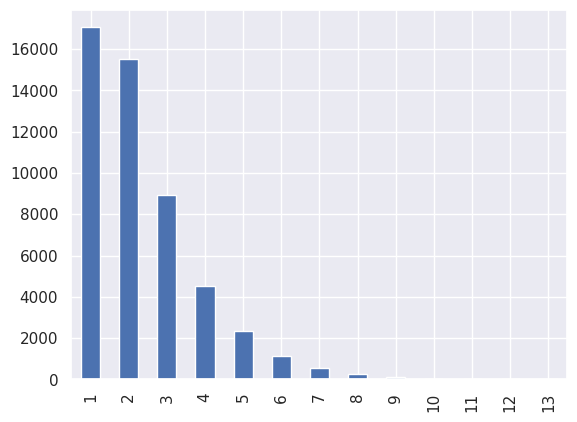

In [33]:
# Quantos jogos possuem aquela quantidade de TAGS em comum
df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().plot(kind='bar')

In [13]:
# Criando nós:
# Adiciona atributos aos nós

# g.add_vp('Name')
# g.add_vp('Publishers')
# g.add_vp('Genres')

aux = []
for _, infos in df_nodes.iterrows():
    
    #Adiciona vértices:
    infos = infos.astype(object)
    g.add_vertex(infos['id'])
    
    # Adiciona atributos:
    vertice = g.get_vertex(infos['id'])
#     vertice['Name'] = infos['Name']
#     vertice['Publishers'] = infos['Publishers']
#     vertice['Genres'] = infos['Genres']

In [14]:
threshold_proximidade = 5

In [15]:
# Criando arestas:

for _ , relacao in df_relation.iterrows():
    
    if(relacao['Tags_em_Comum'] > threshold_proximidade):
        g.add_edge(relacao['node_1'], relacao['node_2'])

In [16]:
# Número de arestas, nós e densidade.

n = g.num_vertices()
m = g.num_edges()

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
d = m / max_edges

# Checando se está de acordo com a documentação.
print('Número de vértices de g:', n )
print('Número de arestas de g:', m)
print('Densidade:', d)

Número de vértices de g: 350
Número de arestas de g: 2097
Densidade: 0.03433483422022104


In [17]:
# Propriedade dos vértices
data = gt_data(g)

# Calculando degrees
in_degrees = []
out_degrees = []
degrees = []

for v in g.all_vertices():
    in_degrees.append(v.in_degree())
for v in g.all_vertices():
    out_degrees.append(v.out_degree())
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data['degree'].describe()

count    350.000000
mean      11.982857
std       15.297424
min        0.000000
25%        0.000000
50%        5.000000
75%       19.000000
max       67.000000
Name: degree, dtype: float64

<AxesSubplot: xlabel='degree', ylabel='Count'>

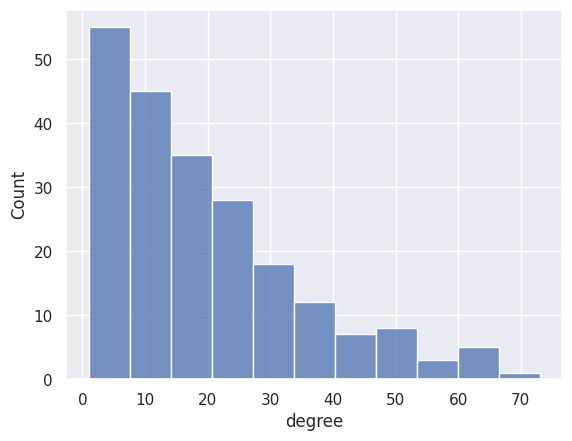

In [70]:
sns.histplot(data['degree'])


In [61]:
# ----- Salva e renderiza grafo -----
gt_save(g, 'projeto.net.gz')

r = netpixi.render('/projeto.net.gz')

In [ ]:
# r.vertex_set_key('Publishers')

In [65]:
#Algoritmo baseado em force-directed graph drawingan : Reingold Fruchterm
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'projeto_frunch.net.gz')
r = netpixi.render('projeto_frunch.net.gz');

In [66]:
import cpnet

from graph_tool import spectral

matrix = spectral.adjacency(g)

# Além de cpnet.Surprise, há outras
# opções de algoritmos discretos:
# cpnet.BE
# cpnet.Lip
# cpnet.LapCore
# cpnet.LapSgnCore
# cpnet.LowRankCore

algorithm = cpnet.Surprise()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('core')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['core'] = int(coreness)
    
# Vamos pintar de vermelho todos os vértices
# identificados como centro e de verde todos
# os vértices identificados como periferia.
    
for v in g.all_vertices():
    if v['core'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)
    

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.

In [67]:
matrix = spectral.adjacency(g)

# Além de cpnet.Rombach, há outras
# opções de algoritmos contínuos:
# cpnet.MINRES
# cpnet.Rossa

algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

# Vamos usar coreness como referência para
# o tamanho dos vértices. Estabelecemos 10
# como o menor tamanho possível e 40 como
# o maior tamanho possível. Como o coreness
# está entre 0 e 1, a conta é bem simples.

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.